In [0]:
from fastai import *
from fastai.vision import *

In [3]:
help(untar_data)     #Use help() of doc() to get ll the details related to all the functions/classes in fastai

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [0]:
path = untar_data(URLs.PETS)

In [5]:
imgP, labP = path.ls()
imgP, labP

(PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'))

In [6]:
fnames = get_image_files(imgP)
fnames[0:2]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_52.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_105.jpg')]

In [0]:
pat = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(imgP, fnames, pat, ds_tfms=get_transforms(), size = 224)   #DataBunch is the data object for fastai.

In [8]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pomeranian,newfoundland,saint_bernard,Maine_Coon,samoyed
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
great_pyrenees,Abyssinian,american_bulldog,leonberger,Sphynx
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

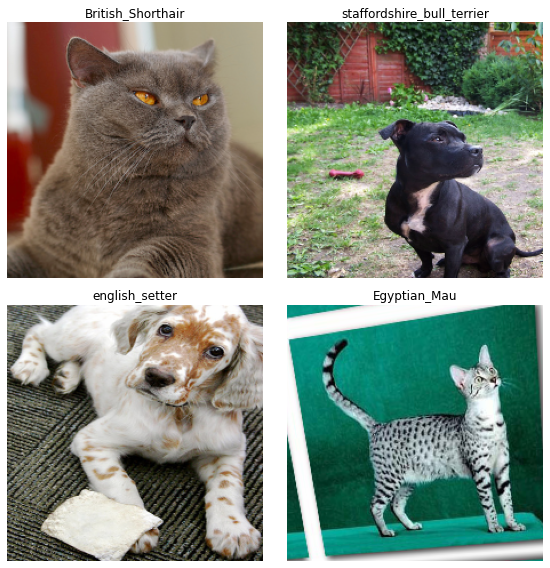

In [9]:
data.show_batch(rows = 2)

In [10]:
print(data.classes); len(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


37

In [0]:
#RESNET34

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [13]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.501560,0.377626,0.108254,01:28
1,0.647938,0.328523,0.097429,01:26
2,0.419116,0.292982,0.090663,01:27
3,0.278108,0.267153,0.084574,01:28
4,0.242657,0.259686,0.083897,01:28


In [0]:
learn.save('stage-1')  

In [15]:
interpret = ClassificationInterpretation.from_learner(learn)      #To interpret the results of the model (learn)

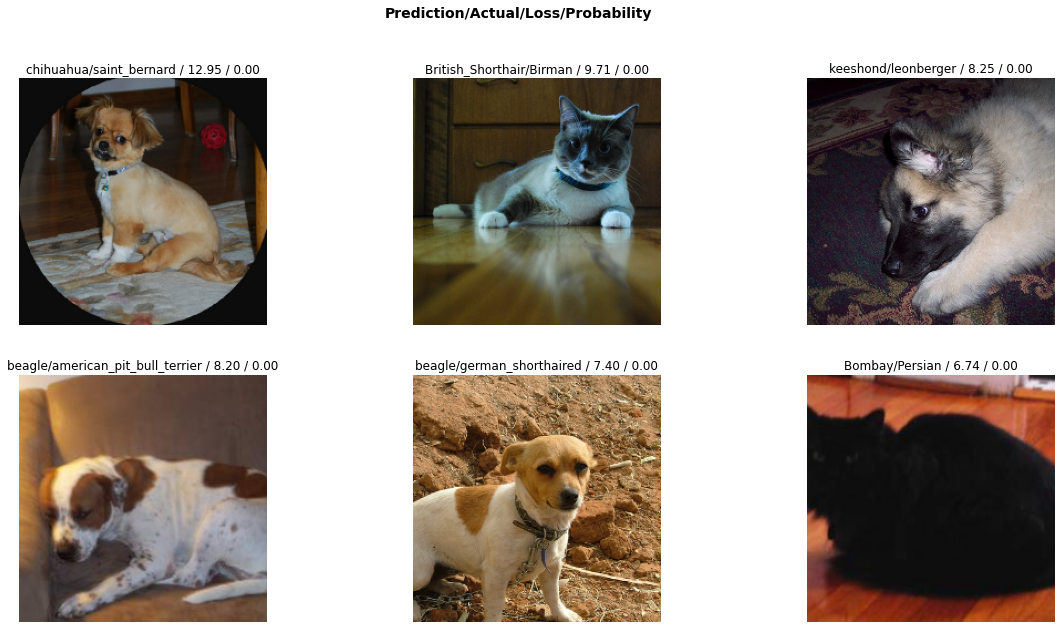

In [16]:
interpret.plot_top_losses(6, figsize = (20, 10))          #Plots top losses, the classes that were most confused for another

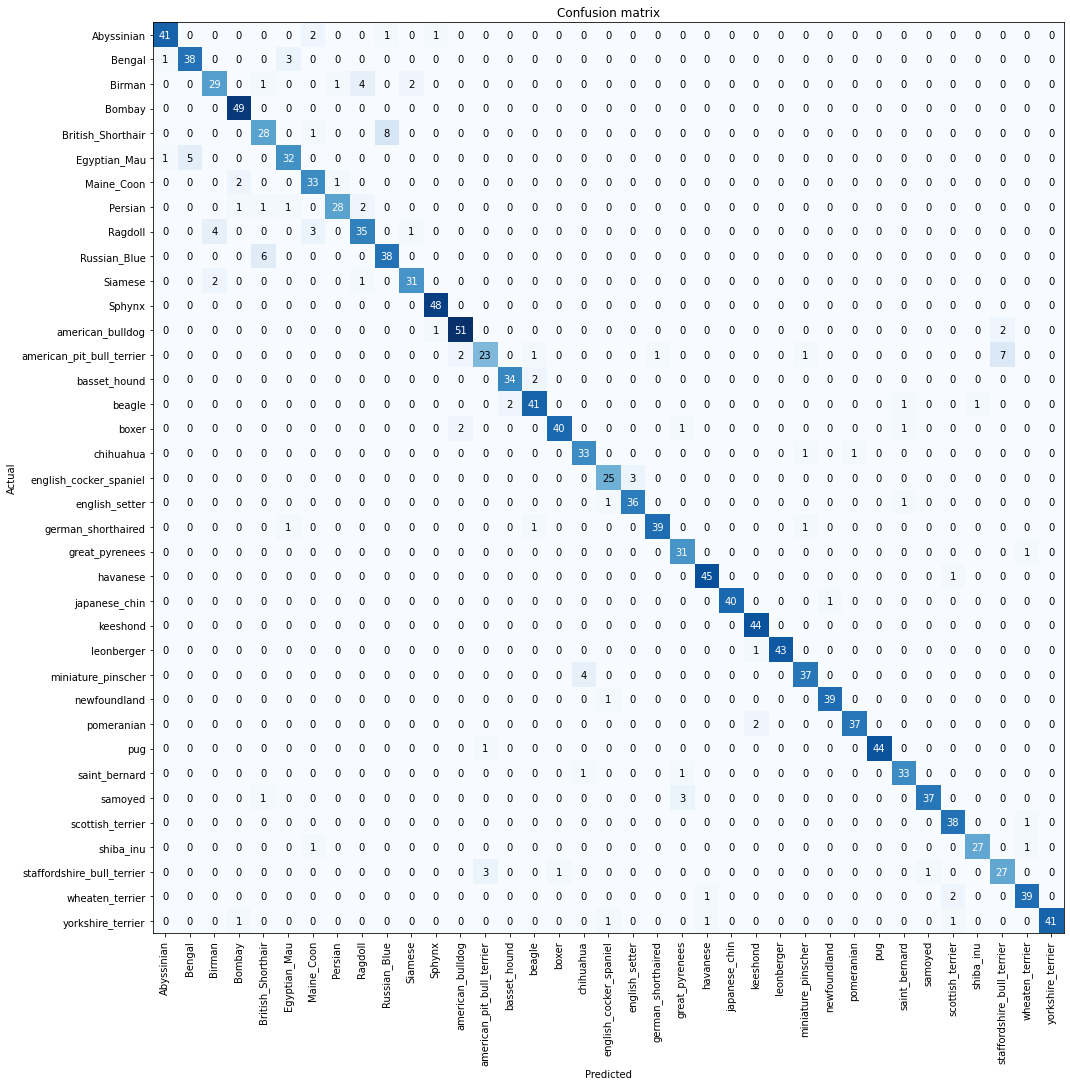

In [22]:
interpret.plot_confusion_matrix(figsize=(15,15))

In [0]:

learn.unfreeze()

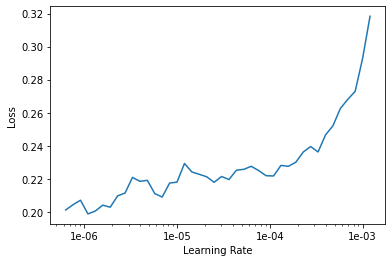

In [29]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.217754,0.251959,0.080514,01:29
1,0.180361,0.251257,0.080514,01:30


In [0]:
learn.save('stage-2')  

In [32]:
interpret = ClassificationInterpretation.from_learner(learn)

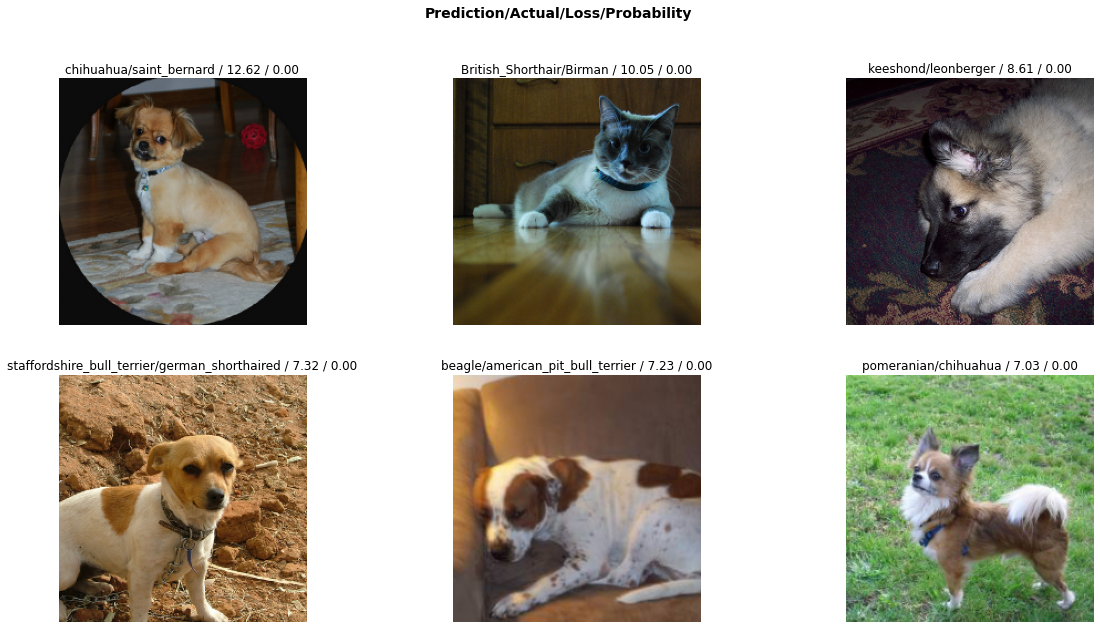

In [33]:
interpret.plot_top_losses(6, figsize = (20, 10))

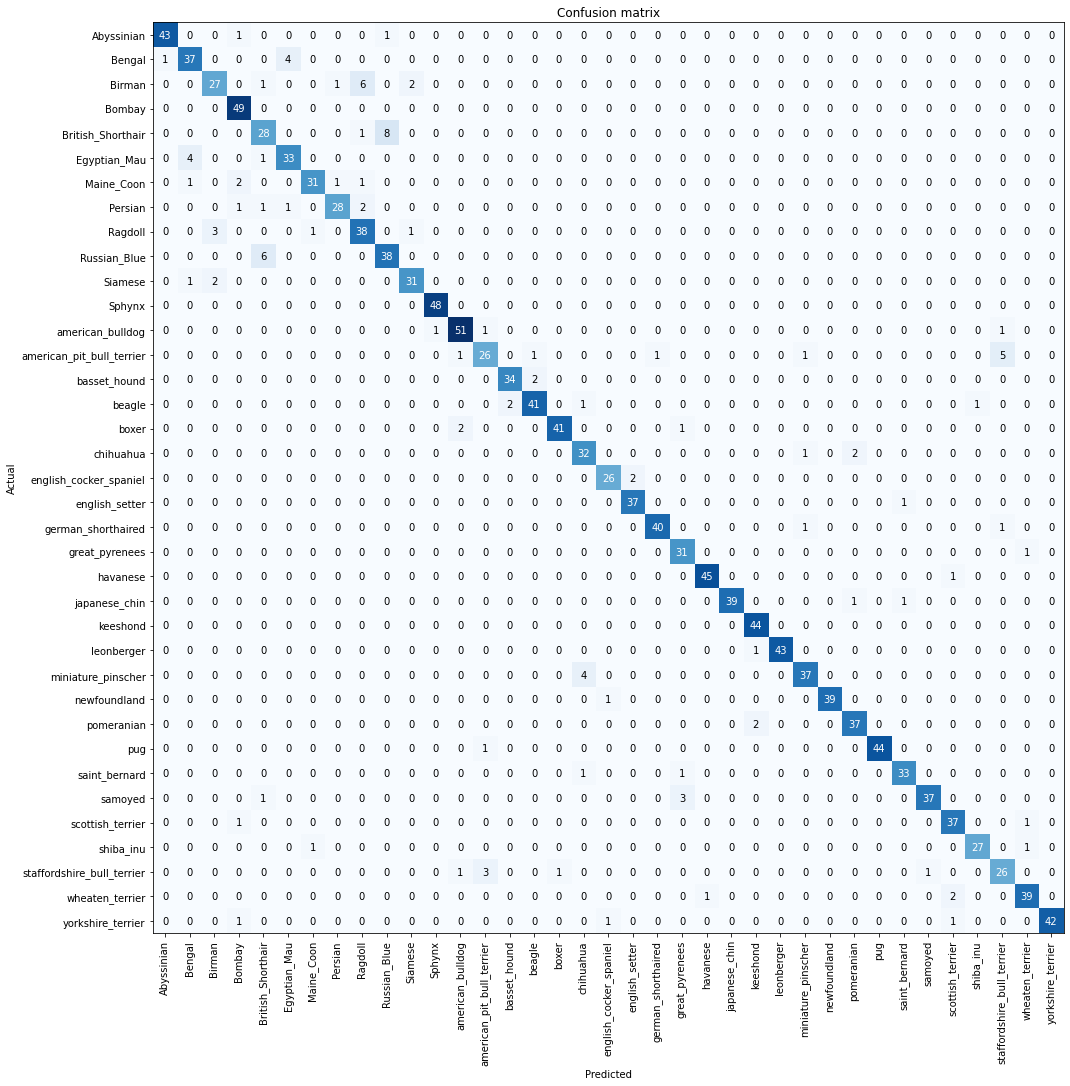

In [34]:
interpret.plot_confusion_matrix(figsize=(15,15))